In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                              ##Importing all libraries

# Load Data into a dataframe

In [3]:
ds = pd.read_csv("Bengaluru_House_Data.csv")       # Reading Dataset
ds.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
ds.describe()                                      # Exploring statistics of data

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
ds.info()                                          # checking data types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [6]:
ds.shape                                            # Exploring data

(13320, 9)

In [7]:
x=ds["total_sqft"].unique()
len(x)

2117

In [8]:
ds1=ds.iloc[:,5:]

In [9]:
ds["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Data Cleaning

In [10]:
ds.drop(["area_type","society","balcony","availability"],axis="columns", inplace=True)  # removing columns not required to build models
ds.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
ds.isnull().sum()            # checking null values 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
ds.groupby(["bath"]).count()       # use mode to handle null values

,location,size,total_sqft,price
bath,,,,
1.0,788,788,788,788
2.0,6908,6908,6908,6908
3.0,3285,3286,3286,3286
4.0,1226,1226,1226,1226
5.0,524,524,524,524
6.0,273,273,273,273
7.0,102,102,102,102
8.0,64,64,64,64
9.0,43,43,43,43


In [13]:
ds["bath"].mode()

0    2.0
dtype: float64

In [14]:
ds["bath"]=ds["bath"].fillna(2.0)

In [15]:
ds.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [16]:
ds=ds.dropna()
ds.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
ds.groupby("size")["size"].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4309
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

# Feature engineering

In [18]:
ds["size"]=ds["size"].apply(lambda x: int(x.split(" ")[0]))
ds.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [19]:
ds["size"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
def sqft(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
ds1=ds[~ds["total_sqft"].apply(sqft)]
ds1.shape

(239, 5)

In [22]:
ds1

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
56,Devanahalli,4,3010 - 3410,2.0,192.000
81,Hennur Road,4,2957 - 3450,2.0,224.500
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
...,...,...,...,...,...
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13240,Devanahalli,1,1020 - 1130,2.0,52.570
13265,Hoodi,2,1133 - 1384,2.0,59.135


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [23]:
def hypen_rem(x):
    sqft=x.split("-")
    if len(sqft)==2:
        x=(float(sqft[0])+float(sqft[1]))/2
        return x
    try:
        return float(x)
    except:
        return None

In [24]:
ds["total_sqft"]=ds["total_sqft"].apply(hypen_rem)
ds["total_sqft"]=ds["total_sqft"].apply(lambda x: x if pd.notnull(x) else False)
ds=ds[ds["total_sqft"]!=0]
ds.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


Adding new feature "Price per square feet"

In [25]:
ds2=ds.copy()                 # Making deep copy of data set to apply operation in data
ds2["price_per_sqft"]=(ds2["price"]*100000)/(ds2["total_sqft"])     
ds2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2.0,39.07,3699.81
1,Chikka Tirupathi,4,2600,5.0,120.00,4615.38
2,Uttarahalli,3,1440,2.0,62.00,4305.56
3,Lingadheeranahalli,3,1521,3.0,95.00,6245.89
4,Kothanur,2,1200,2.0,51.00,4250


In [26]:
ds2["price_per_sqft"].describe()

count     13257.0
unique     7589.0
top        5000.0
freq        147.0
Name: price_per_sqft, dtype: float64


Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [27]:
loc = ds2.groupby("location")["location"].agg('count').sort_values(ascending=False)
loc

location
Whitefield                              537
Sarjapur  Road                          397
Electronic City                         302
Kanakpura Road                          271
Thanisandra                             233
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1298, dtype: int64

In [28]:
print("Total Locations:- ", len(loc))

Total Locations:-  1298


In [29]:
loc.values.sum()

13257

In [30]:
loc_10=loc[loc<=10]
print(loc_10.head(20))
print("Number of locations have 10 or less entries:- ", len(loc_10))

location
Basapura                 10
Naganathapura            10
Thyagaraja Nagar         10
Gunjur Palya             10
Sadashiva Nagar          10
Dairy Circle             10
Ganga Nagar              10
Nagadevanahalli          10
Nagappa Reddy Layout     10
1st Block Koramangala    10
Kalkere                  10
BTM 1st Stage            10
Dodsworth Layout         10
Medahalli                 9
Ejipura                   9
Chandra Layout            9
Yemlur                    9
Kaverappa Layout          9
2nd Phase JP Nagar        9
Kamakshipalya             9
Name: location, dtype: int64
Number of locations have 10 or less entries:-  1058


In [31]:
ds2["location"]=ds2["location"].apply(lambda x:"other" if x in loc_10 else x)
print(ds2["location"].value_counts().head(20))
print("Total categories:-", len(ds2["location"].value_counts()))

other                       2888
Whitefield                   537
Sarjapur  Road               397
Electronic City              302
Kanakpura Road               271
Thanisandra                  233
Yelahanka                    212
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            151
7th Phase JP Nagar           148
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Chandapura                   100
Bellandur                     96
KR Puram                      91
Name: location, dtype: int64
Total categories:- 241


# Outlair Detection and removal

In [32]:
ds2.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2.0,39.07,3699.81
1,Chikka Tirupathi,4,2600,5.0,120.00,4615.38
2,Uttarahalli,3,1440,2.0,62.00,4305.56
3,Lingadheeranahalli,3,1521,3.0,95.00,6245.89
4,Kothanur,2,1200,2.0,51.00,4250


In [33]:
ds3=ds2[~(ds2["total_sqft"]/ds2["size"]<300)]          # removing the unrealisitic data, 
ds3.head()                                             # it is not possible that there will be room is less than 300 sqft

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2.0,39.07,3699.81
1,Chikka Tirupathi,4,2600,5.0,120.00,4615.38
2,Uttarahalli,3,1440,2.0,62.00,4305.56
3,Lingadheeranahalli,3,1521,3.0,95.00,6245.89
4,Kothanur,2,1200,2.0,51.00,4250


In [34]:
ds3.shape

(12513, 6)

In [35]:
ds3["price_per_sqft"].describe()                      # check price per sqft, to build a generic model we need to remove outliar

count     12513.0
unique     7392.0
top        5000.0
freq        146.0
Name: price_per_sqft, dtype: float64

In [36]:
def rm_out(df):
    output=pd.DataFrame()
    for key, subdf in ds3.groupby("location"):
        mean=np.mean(subdf["price_per_sqft"])
        std=np.std(subdf["price_per_sqft"])
        ps_df=subdf[(subdf["price_per_sqft"]>(mean-std)) & (subdf["price_per_sqft"]<=(mean+std))]
        output=pd.concat([output,ps_df], ignore_index=True)
    return output
ds4=rm_out(ds3)

In [37]:
ds4.shape

(10290, 6)

In [38]:
x=np.mean(ds3["price_per_sqft"])
x

6307.441644249871

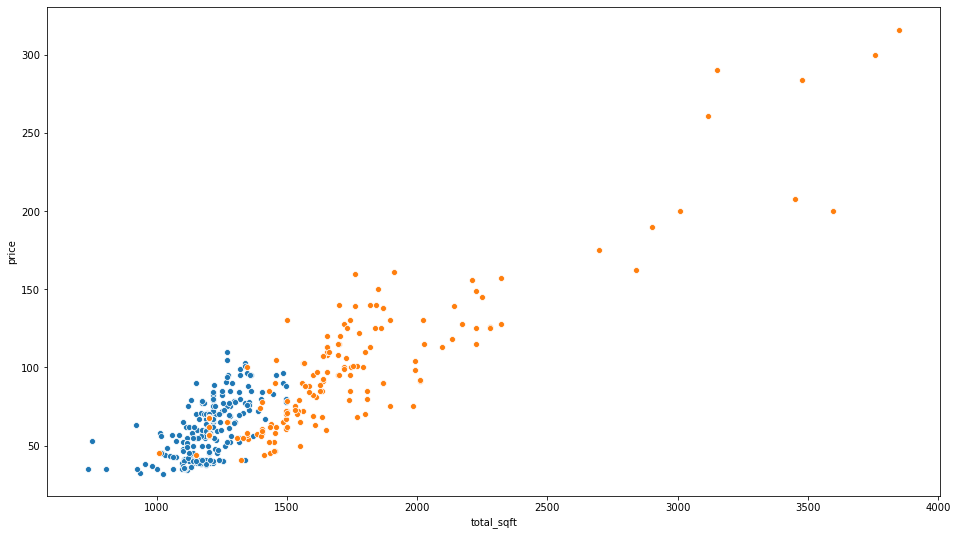

In [39]:
def ploting(dff,location):
    plt.figure(figsize=(16, 9))
    bhk2=dff[(dff["location"]==location) & (dff["size"]==2)]
    bhk3=dff[(dff["location"]==location) & (dff["size"]==3)]
    sns.scatterplot(x="total_sqft", y="price", data=bhk2)
    sns.scatterplot(x="total_sqft", y="price", data=bhk3)
ploting(ds4,"Whitefield")

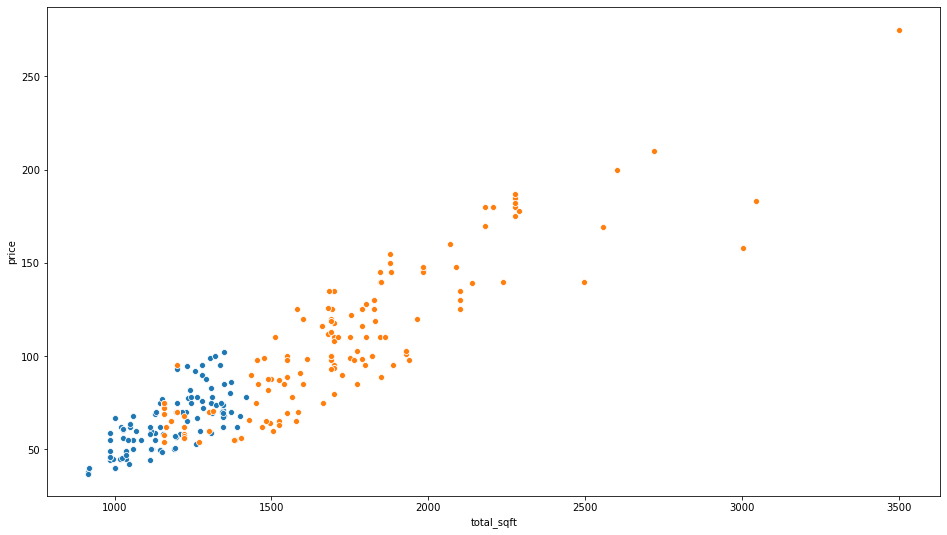

In [40]:
ploting(ds4,"Sarjapur  Road")

It can be noticed that some of house with less room, are more costly rather then more room house of same area for e.g 2 bedroom price is higher then 3. It rare case there can be little difference but here the diffrence is vast.

we will build dictonary for given location and generate stats per bhk i.e

{  '1':{'mean':4000,'std':2000,'count':34},  '2':{'mean':5000,'std':3000,'count':304}  }

Now we can remove those 2bhk appartment whose price_per_sqft is less then mean of price_per_sqdr of 1bhk.

In [41]:
def rm_outliar(dff):
    exclude_indices=np.array([])
    for location, location_df in dff.groupby("location"):
        bhk_stats={}
        for size, size_df in location_df.groupby("size"):
            bhk_stats[size] = { 'mean': np.mean(size_df["price_per_sqft"]), 'std':np.std(size_df["price_per_sqft"]), 'count':size_df.shape[0]
            }
        for size, size_df in location_df.groupby("size"):
            stats=bhk_stats.get(size-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, size_df[size_df.price_per_sqft<(stats['mean'])].index.values)
    return dff.drop(exclude_indices, axis='index')
ds5= rm_outliar(ds4)
ds5.shape

(7354, 6)

In [42]:
ds5.head()

,location,size,total_sqft,bath,price,price_per_sqft
1,Devarachikkanahalli,2,1250,2.0,40.0,3200
2,Devarachikkanahalli,2,1200,2.0,83.0,6916.67
3,Devarachikkanahalli,2,1170,2.0,40.0,3418.8
4,Devarachikkanahalli,3,1425,2.0,65.0,4561.4
5,Devarachikkanahalli,2,947,2.0,43.0,4540.65


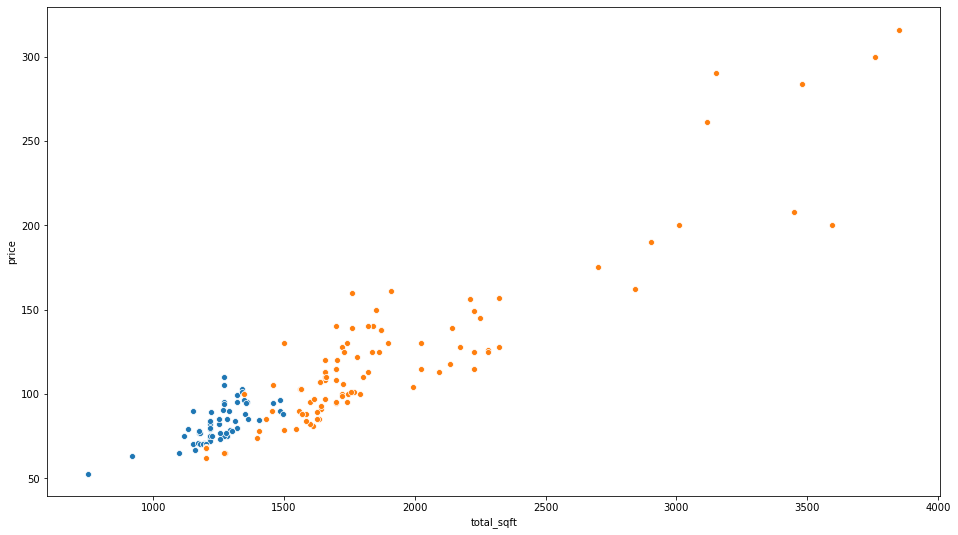

In [43]:
ploting(ds5,"Whitefield")

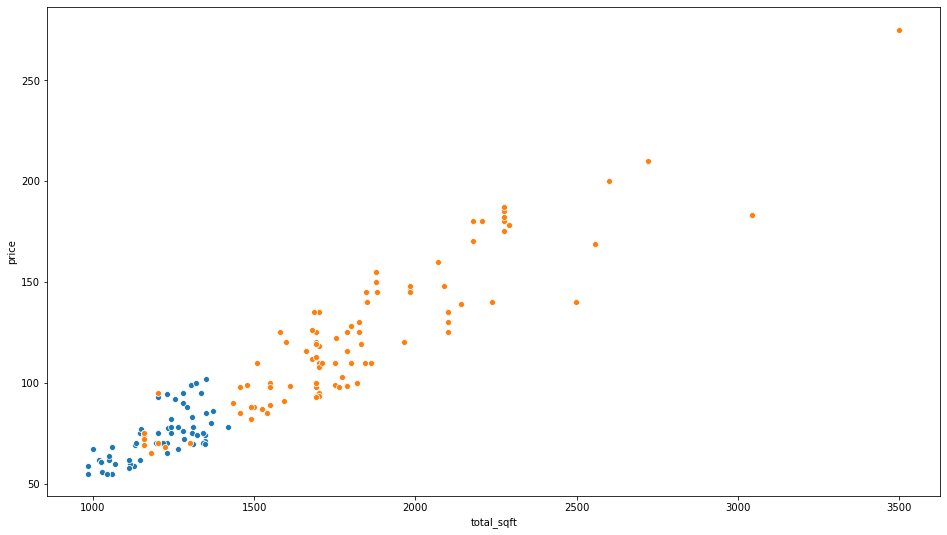

In [44]:
ploting(ds5,"Sarjapur  Road")

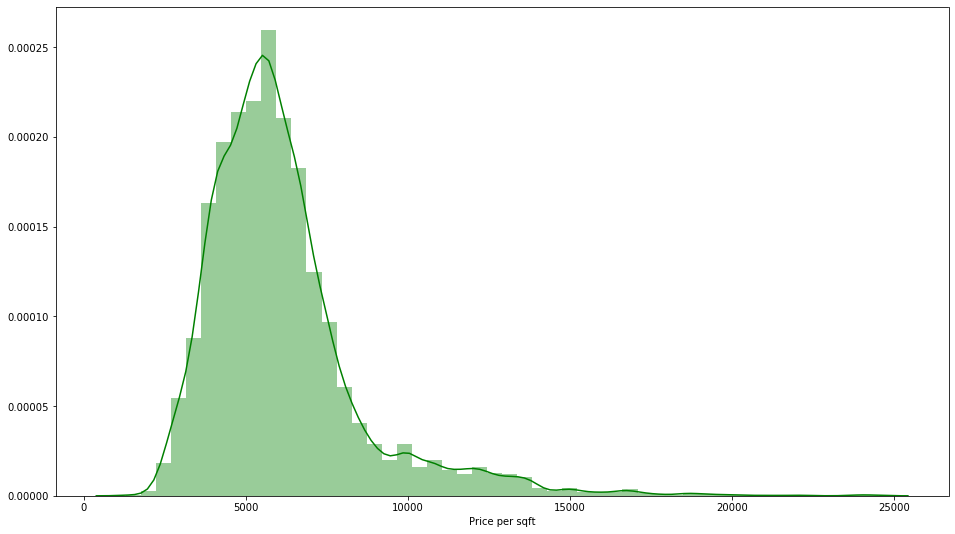

In [45]:
plt.figure(figsize=(16, 9)) 
sns.distplot(ds5["price_per_sqft"], axlabel="Price per sqft", color="green")        

# checking distribution of data 

# Exploring Bathrooms Feature

In [46]:
ds5["bath"].value_counts()

2.0     4221
3.0     1762
1.0      580
4.0      496
5.0      174
6.0       80
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

In [47]:
ds5[ds5["bath"]>10]

,location,size,total_sqft,bath,price,price_per_sqft
5300,Neeladri Nagar,10,4000,12.0,160.0,4000
8522,other,10,12000,12.0,525.0,4375
8611,other,16,10000,16.0,550.0,5500
9351,other,11,6000,12.0,150.0,2500
9683,other,13,5425,13.0,275.0,5069.12


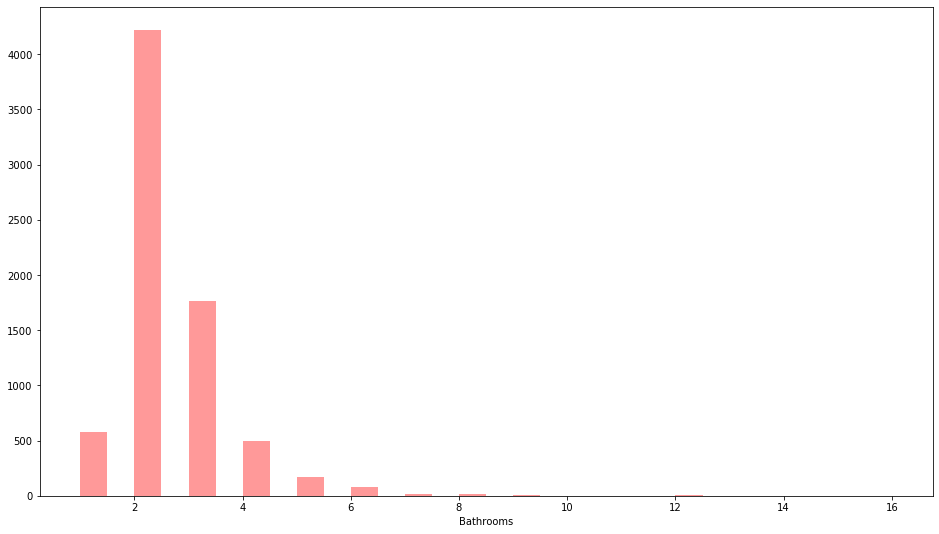

In [48]:
plt.figure(figsize=(16, 9)) 
sns.distplot(ds5["bath"], axlabel="Bathrooms", color="red", kde=False, bins=30)

We will follow the criteria that bathroom cannot be more than bedroom + 2. let us check the data lie this condition.

In [49]:
ds5=ds5[~(ds5["bath"]>ds5["size"]+2)]
ds5.shape

(7350, 6)

In [50]:
ds6 = ds5.drop(["price_per_sqft"],axis='columns')
ds6.head()

,location,size,total_sqft,bath,price
1,Devarachikkanahalli,2,1250,2.0,40.0
2,Devarachikkanahalli,2,1200,2.0,83.0
3,Devarachikkanahalli,2,1170,2.0,40.0
4,Devarachikkanahalli,3,1425,2.0,65.0
5,Devarachikkanahalli,2,947,2.0,43.0


# Handling categorical Data by One Hot Encoding

In [51]:
dummies=pd.get_dummies(ds6["location"])
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
ds7=pd.concat([ds6,dummies.drop('other',axis='columns')], axis='columns')
ds7.head()

# droping one column from dummies

,location,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200,2.0,83.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425,2.0,65.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,947,2.0,43.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
ds7.drop(['location'], axis='columns', inplace=True)
ds7.head()

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
ds7.shape

(7350, 244)

# Applying Linear regression

In [55]:
ds7.head()

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200,2.0,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170,2.0,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425,2.0,65.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947,2.0,43.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
x=ds7.drop("price", axis="columns")
y=ds7.price
x.head()

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
lireg_house = LinearRegression()
lireg_house.fit(X_train,y_train)
lireg_house.score(X_test,y_test)

0.8622141924255878

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.86496527, 0.80567145, 0.84913586, 0.82758197, 0.8056866 ])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : 
            {'model': LinearRegression(),'params': {'normalize': [True, False]}},
        'lasso': 
            {'model': Lasso(),'params': {'alpha': [1,2],'selection': ['random', 'cyclic']}},
        'decision_tree': 
            {'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random']}}
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.830608,{'normalize': False}
1,lasso,0.713740,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.698459,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Testing Model

In [64]:
def predict_price(location,total_sqft,bath,size):    
    loc_index = np.where(x.columns==location)[0][0]
    v = np.zeros(len(x.columns))
    v[0] = size
    v[1] = total_sqft
    v[2] = bath
    if loc_index >= 0:
        v[loc_index] = 1
    return lireg_house.predict([v])[0]

In [65]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

85.90849569215239

In [66]:
predict_price('2nd Stage Nagarbhavi',1000, 2, 2)

225.86306641944452

In [67]:
predict_price('Indira Nagar',1000, 3, 3)

179.7157267807427

# Export the tested model to a pickle file

In [69]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lireg_house,f)